<a href="https://colab.research.google.com/github/fernandosagastume/SPLABS/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Headless Model
#Fernando José Sagastume
#Carnet: 17004989
#Sección: A

%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [45]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

In [0]:
class_names = ['naruto','sasuke']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'naruto')  
train_im_dir = os.path.join(train_dir, 'sasuke')  
validation_ca_dir = os.path.join(validation_dir, 'naruto') 
validation_im_dir = os.path.join(validation_dir, 'sasuke')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
IMAGE_SIZE = (224, 224)
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return

In [0]:
img_dir = os.path.realpath('Images/')

In [49]:
queries = ['ninja','9 tail fox','modo sabio','rasengan','hokage']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='naruto '+ query, numberImage=1000)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=naruto ninja&source=lnms&tbm=isch
Number of Images cannot exceeds 100
Error  'NoneType' object is not iterable
Invalid image:  45.jpg cannot write mode P as JPEG
Invalid image:  88.jpg cannot write mode P as JPEG
Invalid image:  8.jpg cannot write mode P as JPEG
Invalid image:  42.jpg cannot write mode RGBA as JPEG
Invalid image:  61.jpg cannot write mode RGBA as JPEG
Invalid image:  25.jpg cannot write mode RGBA as JPEG
Invalid image:  53.jpg cannot write mode RGBA as JPEG
Invalid image:  78.jpg cannot write mode P as JPEG
Invalid image:  1.jpg cannot write mode RGBA as JPEG
Invalid image:  17.jpg cannot write mode RGBA as JPEG
Invalid image:  90.jpg cannot write mode P as JPEG
Invalid image:  14.jpg cannot write mode RGBA as JPEG
Invalid image:  56.jpg cannot write mode P as JPEG
Invalid image:  31.jpg cannot write mode RGBA as JPEG
Invalid image:  19.jpg cannot write mode RGBA as JPEG
Invalid image:  20.jpg cannot write mode P as JPEG
Invalid image:

In [50]:
queries = ['ninja','sharingan','curse mark','chidori','rinnegan']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='sasuke '+query, numberImage=1000)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=sasuke ninja&source=lnms&tbm=isch
Number of Images cannot exceeds 100
Error  'NoneType' object is not iterable
Invalid image:  45.jpg cannot write mode P as JPEG
Invalid image:  88.jpg cannot write mode P as JPEG
Invalid image:  8.jpg cannot write mode P as JPEG
Invalid image:  42.jpg cannot write mode RGBA as JPEG
Invalid image:  61.jpg cannot write mode RGBA as JPEG
Invalid image:  25.jpg cannot write mode RGBA as JPEG
Invalid image:  53.jpg cannot write mode RGBA as JPEG
Invalid image:  78.jpg cannot write mode P as JPEG
Invalid image:  1.jpg cannot write mode RGBA as JPEG
Invalid image:  17.jpg cannot write mode RGBA as JPEG
Invalid image:  90.jpg cannot write mode P as JPEG
Invalid image:  14.jpg cannot write mode RGBA as JPEG
Invalid image:  56.jpg cannot write mode P as JPEG
Invalid image:  31.jpg cannot write mode RGBA as JPEG
Invalid image:  19.jpg cannot write mode RGBA as JPEG
Invalid image:  20.jpg cannot write mode P as JPEG
Invalid image:

In [51]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Naruto images:', len(os.listdir(train_ca_dir)))
print('total training Sasuke images:', len(os.listdir(train_im_dir)))

print('total validation Naruto images:', len(os.listdir(validation_ca_dir)))
print('total validation Sasuke images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Naruto images: 295
total training Sasuke images: 295
total validation Naruto images: 50
total validation Sasuke images: 50
--
Total training images: 590
Total validation images: 100


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [53]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 590 images belonging to 2 classes.


In [54]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 100 images belonging to 2 classes.


In [0]:
image_batch, labels_batch = next(train_data_gen)

In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

In [57]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [0]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [59]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['mortarboard', 'comic book', 'handkerchief', 'lighter',
       'spotlight', 'comic book', 'running shoe', 'lionfish',
       'comic book', 'comic book', 'mortarboard', 'cloak', 'warplane',
       'wig', 'comic book', 'comic book', 'wing', 'wing', 'ski', 'mask',
       'feather boa', 'comic book', 'hair slide', 'hair slide',
       'comic book', 'shovel', 'crash helmet', 'poncho', 'bearskin',
       'comic book', 'spotlight', 'mortarboard'], dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

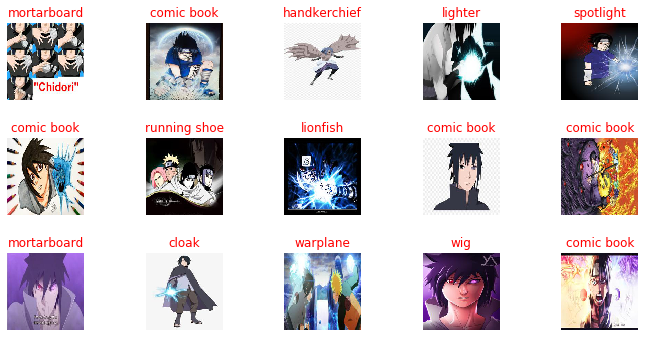

In [61]:
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [64]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

In [66]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


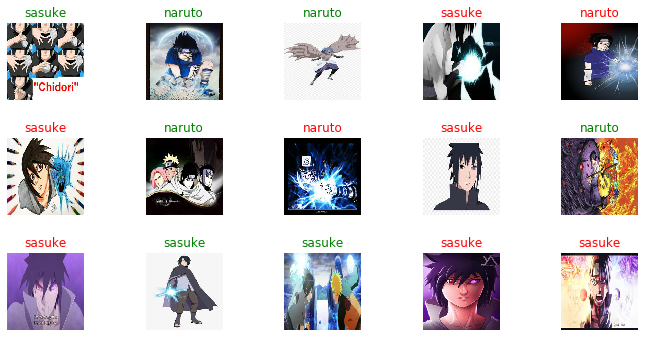

In [67]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 42s 8s/step - loss: 1.6302 - accuracy: 0.4375 - val_loss: 1.0387 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 37s 7s/step - loss: 1.6250 - accuracy: 0.4789 - val_loss: 0.9871 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 39s 8s/step - loss: 1.3334 - accuracy: 0.4688 - val_loss: 0.7291 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 39s 8s/step - loss: 1.0581 - accuracy: 0.4750 - val_loss: 0.6769 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 37s 7s/step - loss: 0.8721 - accuracy: 0.5063 - val_loss: 0.6772 - val_accuracy: 0.5000


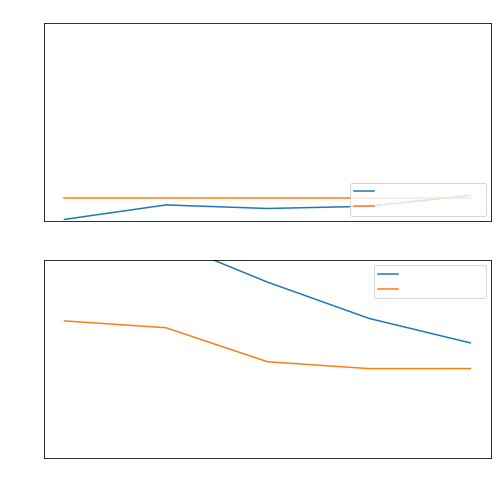

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

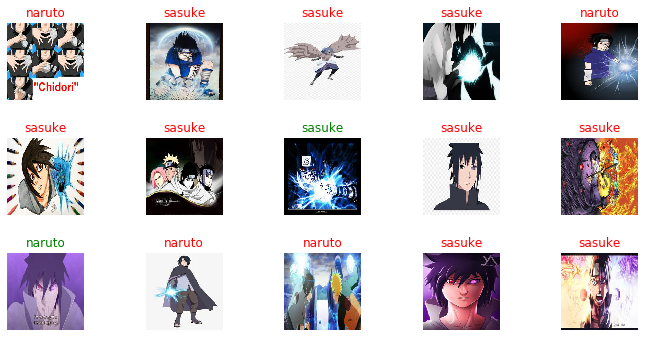

In [71]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
base_model = ResNet50V2(input_shape=IMAGE_SIZE+(3,),
                                               include_top=False,
                                               weights='imagenet')

In [73]:
base_model.trainable = False
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [74]:
model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')    
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 1/5
5/5 [==============================] - 48s 10s/step - loss: 1.2742 - accuracy: 0.5125 - val_loss: 1.7008 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 41s 8s/step - loss: 1.0809 - accuracy: 0.5211 - val_loss: 0.9320 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 43s 9s/step - loss: 0.7379 - accuracy: 0.5813 - val_loss: 0.8952 - val_accuracy: 0.5000
Epoch 4/5
5/5 [==============================] - 43s 9s/step - loss: 0.6480 - accuracy: 0.6375 - val_loss: 0.7781 - val_accuracy: 0.5000
Epoch 5/5
5/5 [==============================] - 44s 9s/step - loss: 0.8411 - accuracy: 0.4563 - val_loss: 0.8147 - val_accuracy: 0.5000


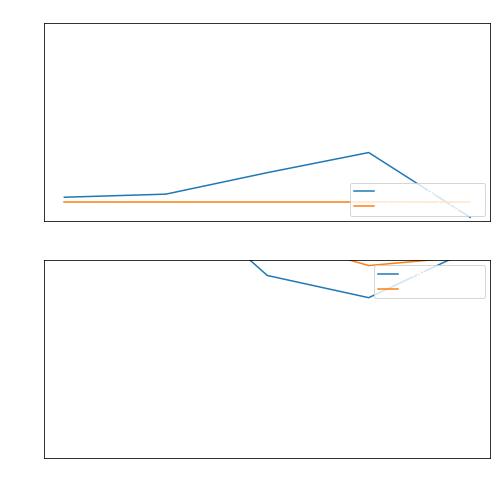

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,0.8])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

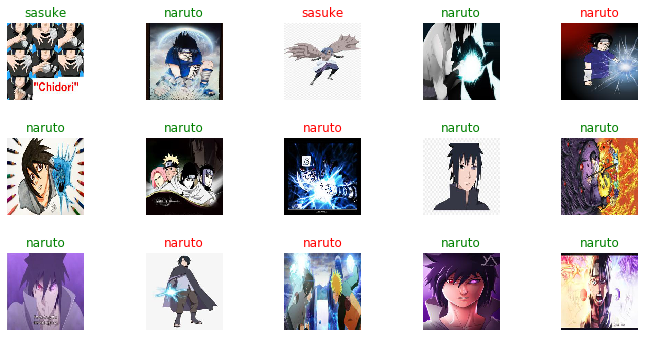

In [78]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
base_model.trainable = True

In [80]:
print("Number of layers in the base model: ", len(base_model.layers))
fine_tune_at = 160
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  190


In [81]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 16,542,721
Non-trainable params: 9,121,280
_________________________________________________________________


In [82]:
initial_epochs = 5
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_data_gen,
                         epochs=total_epochs,
                         steps_per_epoch=5,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_data_gen)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 4 steps
Epoch 5/10
5/5 [==============================] - 52s 10s/step - loss: 0.9096 - accuracy: 0.4648 - val_loss: 0.7809 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 49s 10s/step - loss: 0.7226 - accuracy: 0.4577 - val_loss: 7.3699 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 56s 11s/step - loss: 0.7171 - accuracy: 0.5125 - val_loss: 4.0040 - val_accuracy: 0.5000
Epoch 8/10
5/5 [==============================] - 50s 10s/step - loss: 0.7144 - accuracy: 0.5493 - val_loss: 1.5779 - val_accuracy: 0.5000
Epoch 9/10
5/5 [==============================] - 53s 11s/step - loss: 0.7040 - accuracy: 0.4938 - val_loss: 1.3055 - val_accuracy: 0.5000
Epoch 10/10
5/5 [==============================] - 54s 11s/step - loss: 0.6983 - accuracy: 0.4500 - val_loss: 2.4152 - val_accuracy: 0.5000


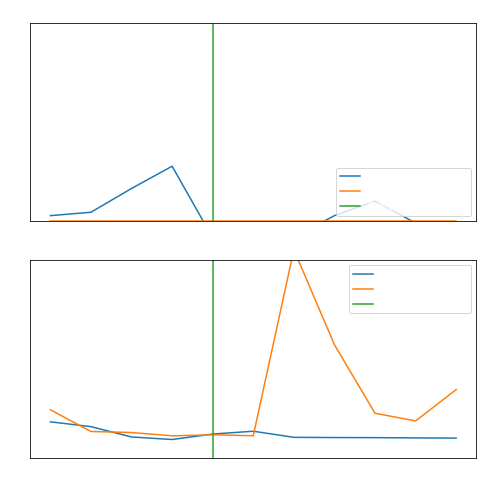

In [83]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 7.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

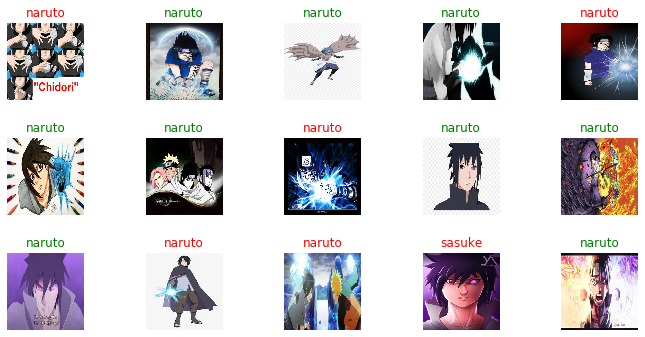

In [84]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)